# Telecom Churn Prediction | Exploratory Data Analysis

## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Initialize

In [2]:
pd.set_option('display.max_columns', None)

## Load the data

In [3]:
raw_df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df = raw_df.copy()

In [5]:
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Shape of the data

In [6]:
df.shape

(7043, 21)

## Exploring data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Descriptive statistics

In [8]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Missing values

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploring Categorical and Numerical columns

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [13]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [14]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [15]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

The Senior Citizen column is labeled as integer. Upon verifying it is confirmed that it is a cateogircal value 

In [16]:
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')
categorical_cols.append('SeniorCitizen')

In [17]:
numeric_cols = [col for col in df.columns if col not in categorical_cols and col not in ('customerID', 'Churn')]
numeric_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

### Exploring categorical variables against target

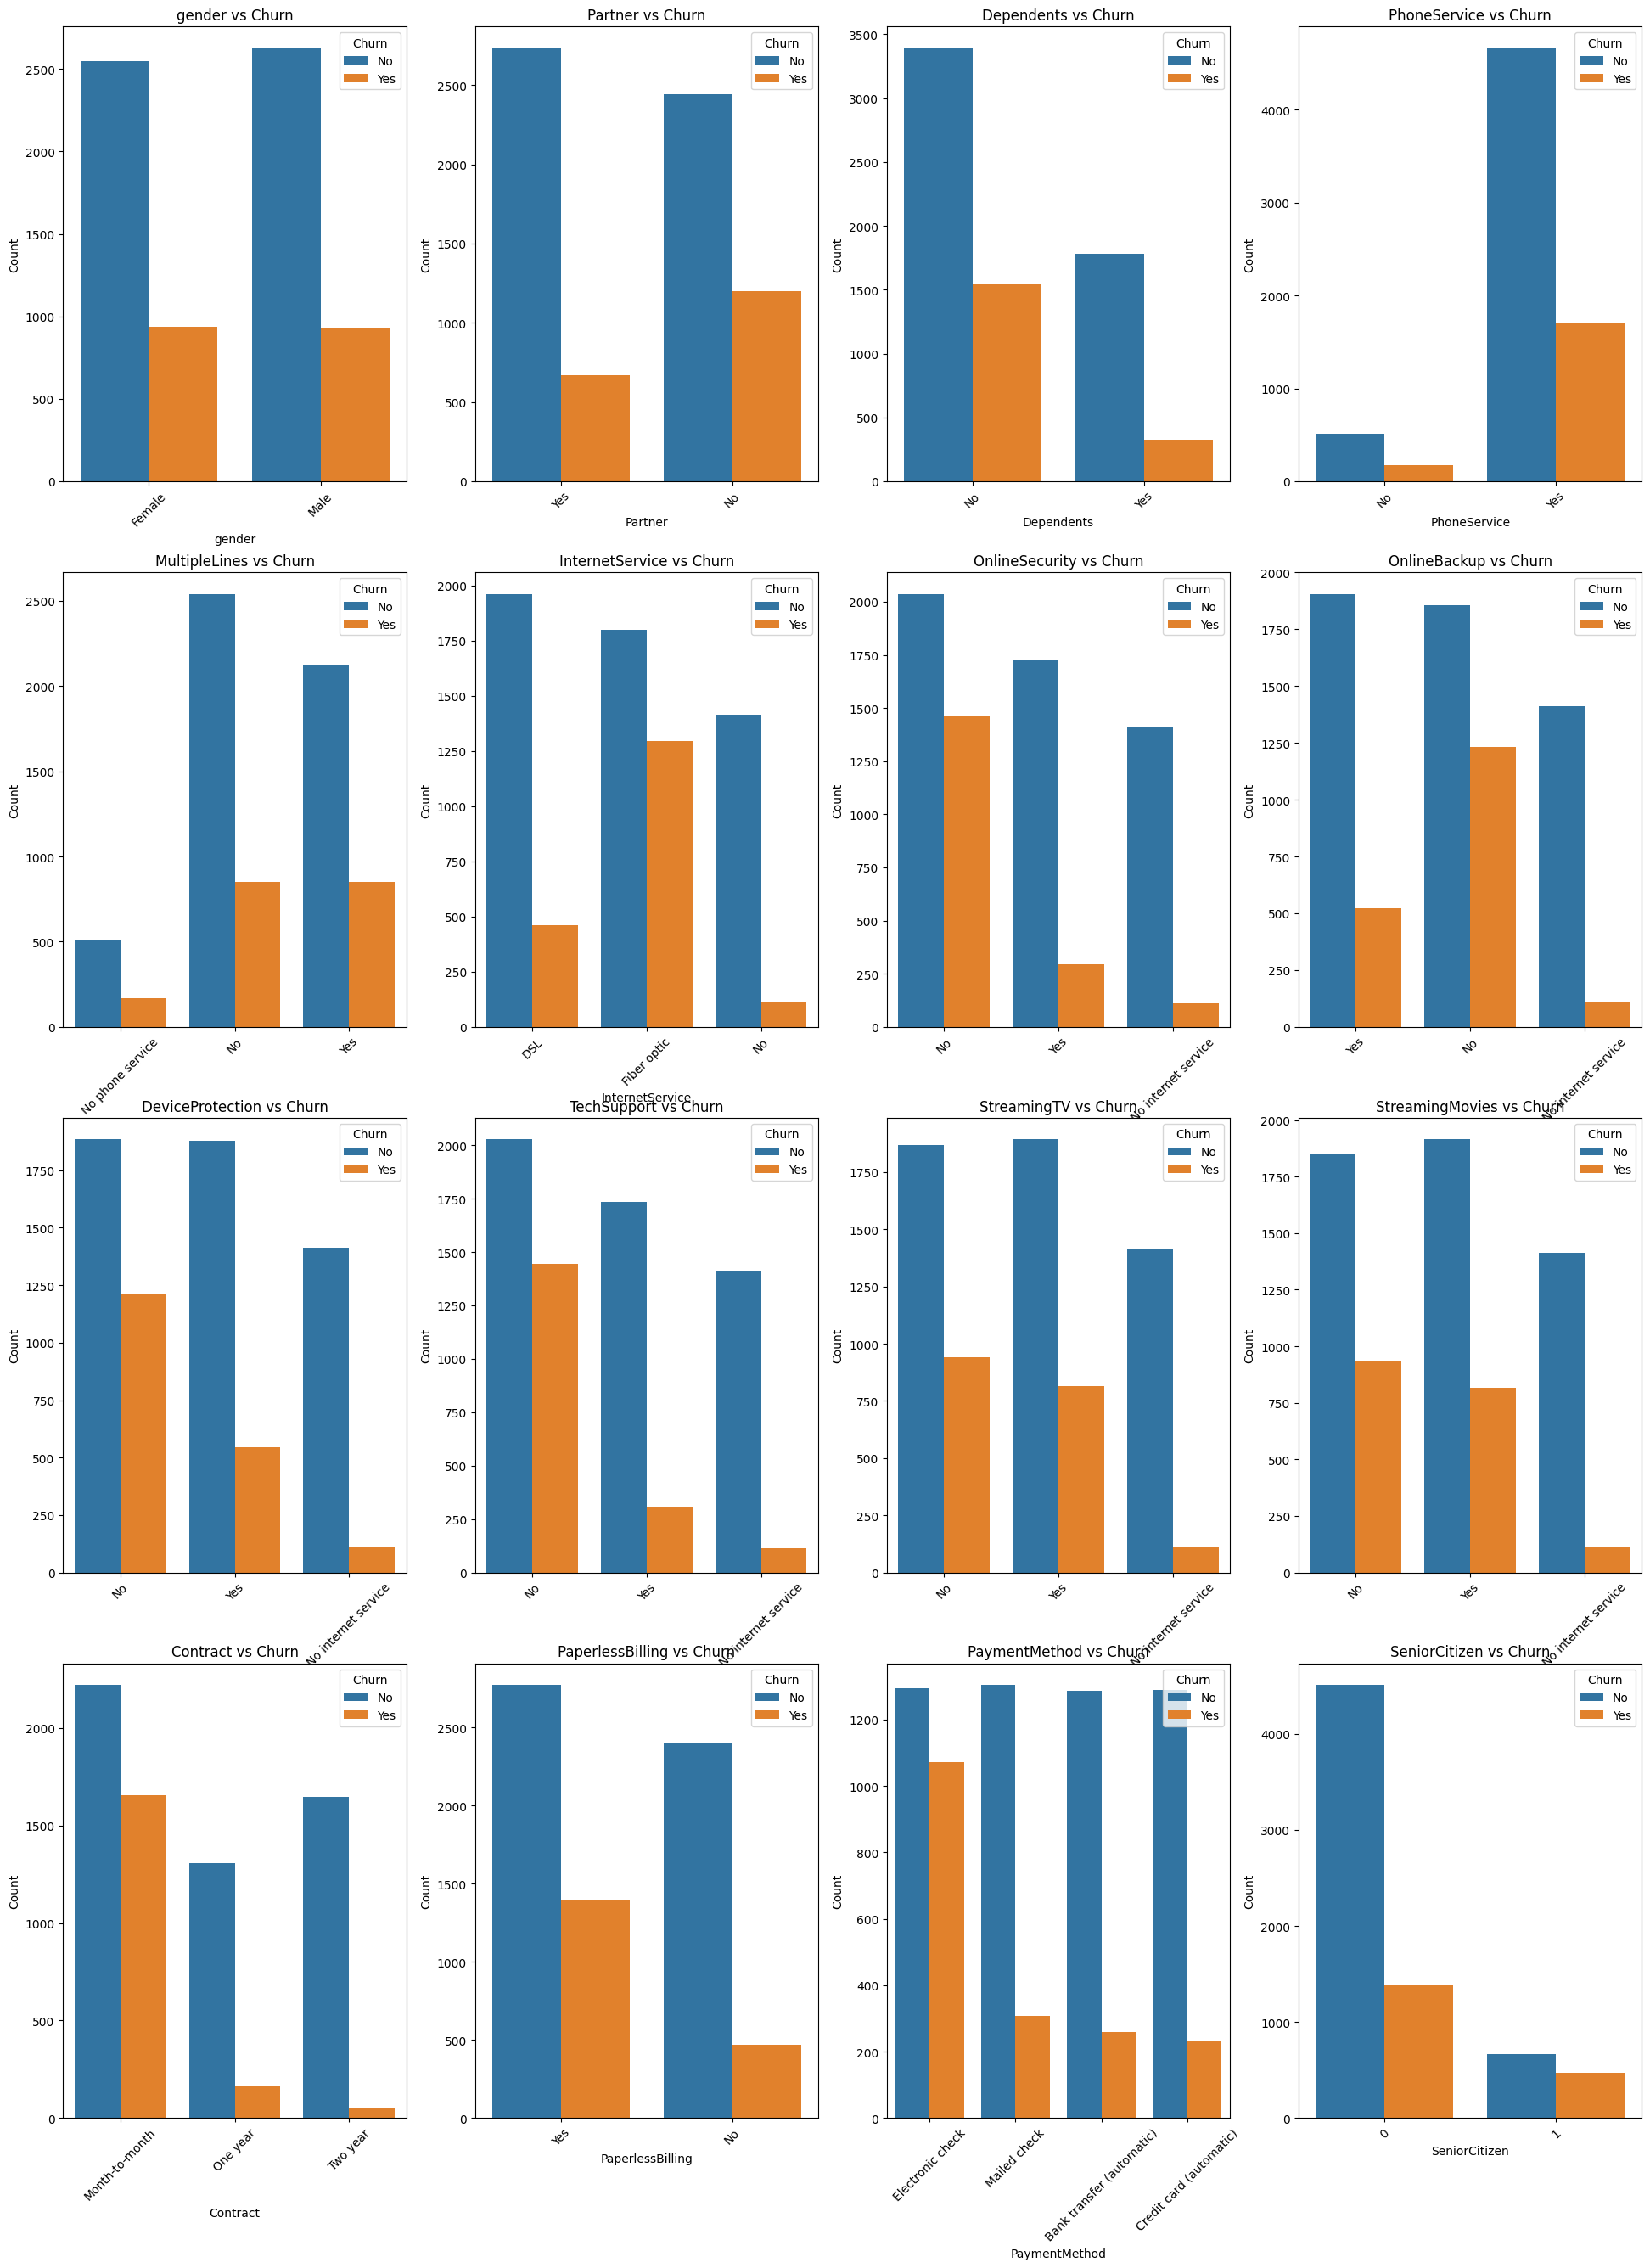

In [18]:
n_cols = 4
n_rows = (len(categorical_cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 8*n_rows))
axes = axes.flatten()

for i, cols in enumerate(categorical_cols):
    sns.countplot(x=cols, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f"{cols} vs Churn")
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn', loc='upper right')

### Exploring numerical columns against target

C:\Users\sanid\AppData\Local\Temp\ipykernel_32356\3723604423.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Churn', loc='upper right')
C:\Users\sanid\AppData\Local\Temp\ipykernel_32356\3723604423.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Churn', loc='upper right')
C:\Users\sanid\AppData\Local\Temp\ipykernel_32356\3723604423.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Churn', loc='upper right')


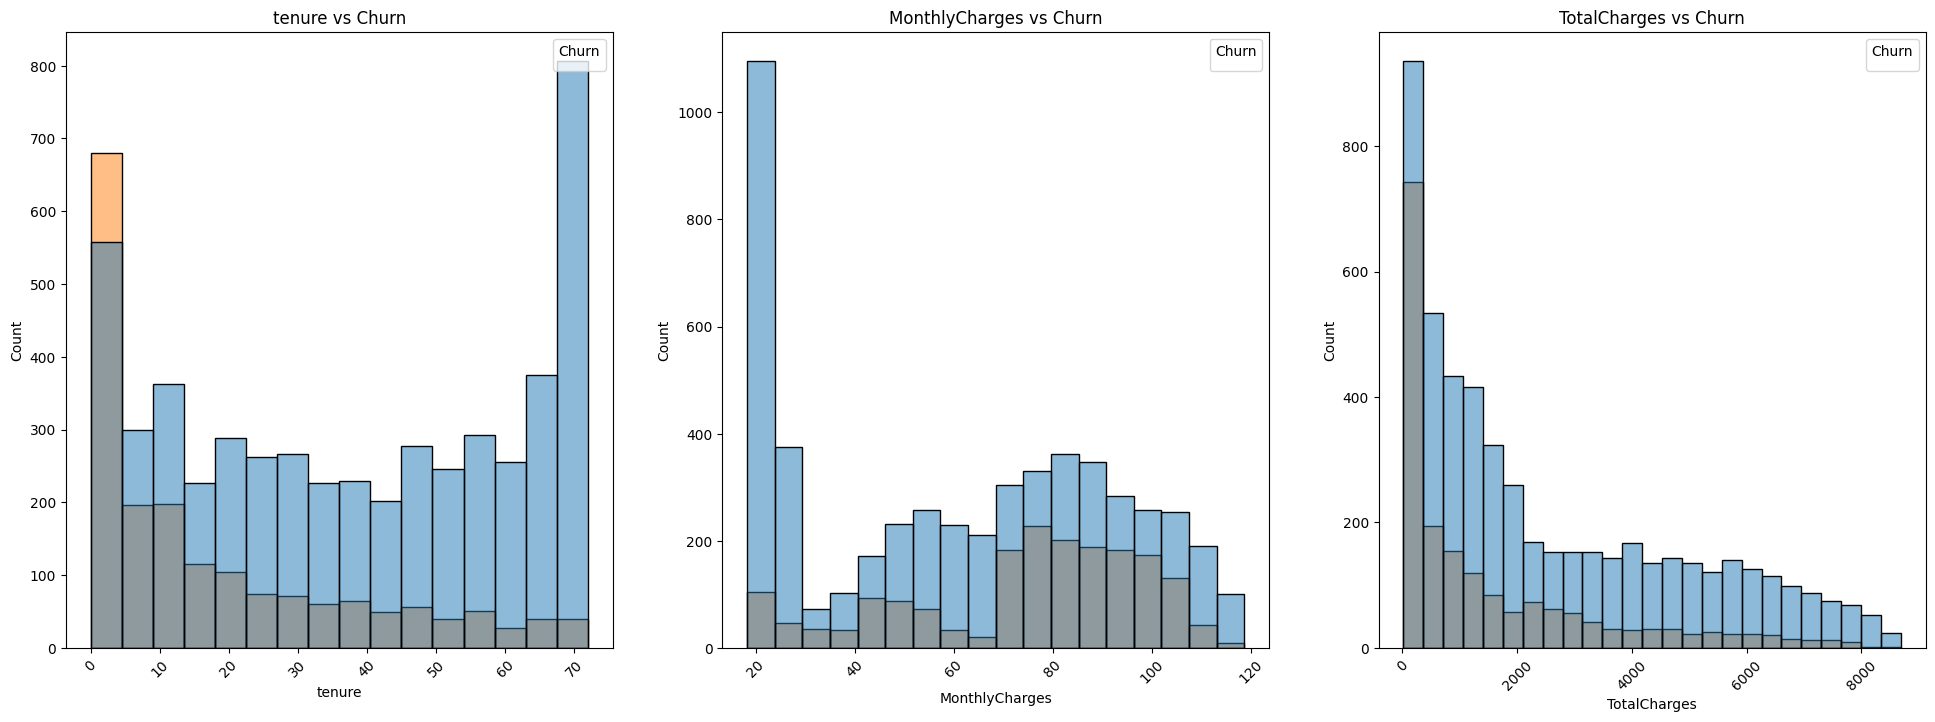

In [19]:
n_cols = len(numeric_cols)
n_rows = (len(numeric_cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 8))
axes = axes.flatten()

for i, cols in enumerate(numeric_cols):
    sns.histplot(x=cols, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f"{cols} vs Churn")
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn', loc='upper right')


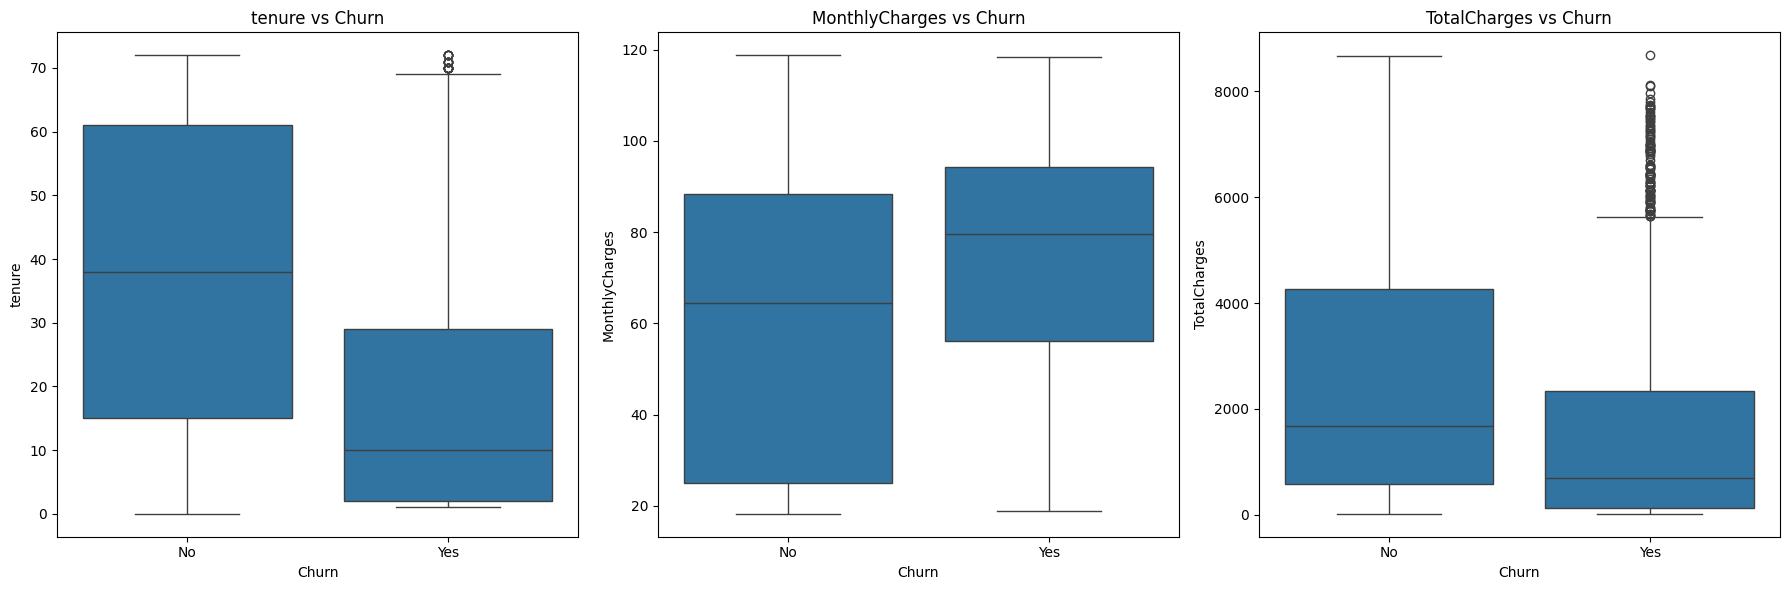

In [20]:
n_cols = len(numeric_cols)
n_rows = (len(numeric_cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 6*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Detecting Outliers

In [21]:
summary = [] 

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outlier_mask.sum()
    outlier_percentage = round(100 * outlier_mask.mean(), 2)

    summary.append([col, lower_bound, upper_bound, outlier_count, outlier_percentage])

outlier_summary = pd.DataFrame(summary, columns=['Feature', 'Lower Bound', 'Upper Bound', 'Outlier Count', 'Outlier Percentage'])
outlier_summary

,Feature,Lower Bound,Upper Bound,Outlier Count,Outlier Percentage
0,tenure,-60.00000,124.00000,0,0.0
1,MonthlyCharges,-46.02500,171.37500,0,0.0
2,TotalCharges,-4688.48125,8884.66875,0,0.0


## Exploring target variables

In [22]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Exploring correlations

In [23]:
df['Churn_Encoded'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [24]:
numeric_cols_with_churn = numeric_cols + ['Churn_Encoded']

In [25]:
corr = df[numeric_cols_with_churn].corr()

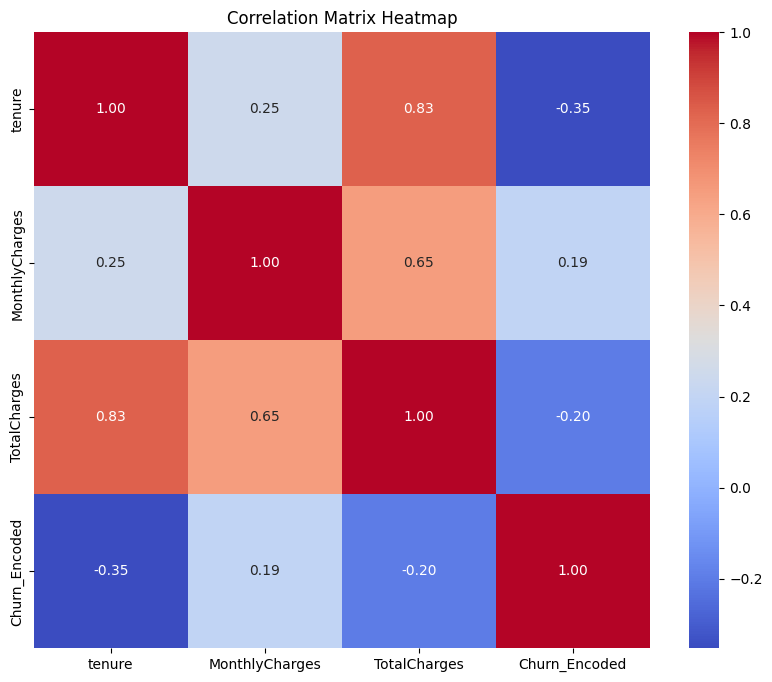

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Exploring pairwise relationships in numeric columns

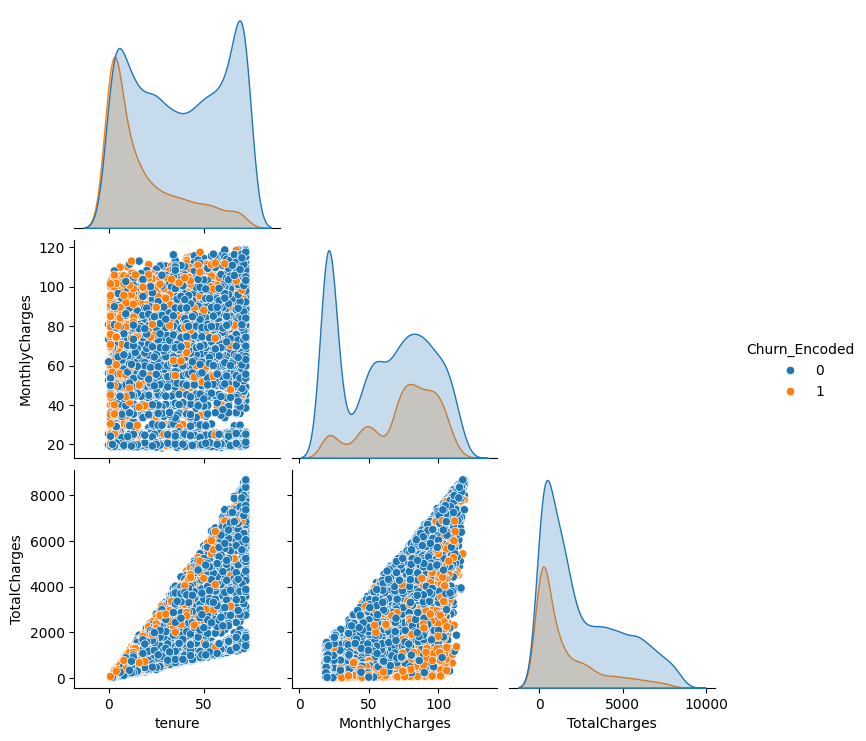

In [27]:
sns.pairplot(df[numeric_cols_with_churn], hue='Churn_Encoded', corner=True)
plt.show()

### Summary of findings


- Exploring categorical variables
  - Gender shows a relatively equal rate of churn between males and females
  - Young people tends to have a higher retention rate than senior citizens
  - People who are using fiber optic as an internet service tends to have a higher possibility of churn
  - People who are not using online security have higher tendency of churning
  - People who are in a month-to-month contract have a higher churn rate, while other contracts shows a higher retention rate.
  - The graph shows using electronics checks as a payment method has a higher churn rate
- Exploring numerical variables
  - There who have a monthly charge less than 30 shows a higher possibility of churn than the rest of the distribution
  - Total chargers have a features of an exponential or chi-squared distribution to the churn rate.

- Class balance
  - The dataset is not properly balanced. It has around 1 : 3 of yes to no data.
- Correlation
  - Tenure and Monthly chargers have a higher correlation against Total chargers. This maybe due to the fact that in most cases total chargers is calculated as a function of tenure and monthly chargers